<a href="https://colab.research.google.com/github/SaulVid/mat421sv/blob/main/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analytical Methods vs Numerical Methods.**

In mathemtics there are multiple ways of solving things. Some things yield very nice results becuse their underlying structureis well known. These models are  used in academia to teach students math. However is real world applications, data and underlying functions are not always so easy to work with. It is often the case that Analytical methods may not be ideal or find solutions to problems or sort data. This is where Numerical Analysis comes in. Numerical analysis is a field of mathematics that deals with making approxinations. There are several ways to make those approximations depending on the type of data and problem. One of those numerical methods is known as interpolation.



Linear Interpolation can be used to estime new data points from points that are given. 

4.5


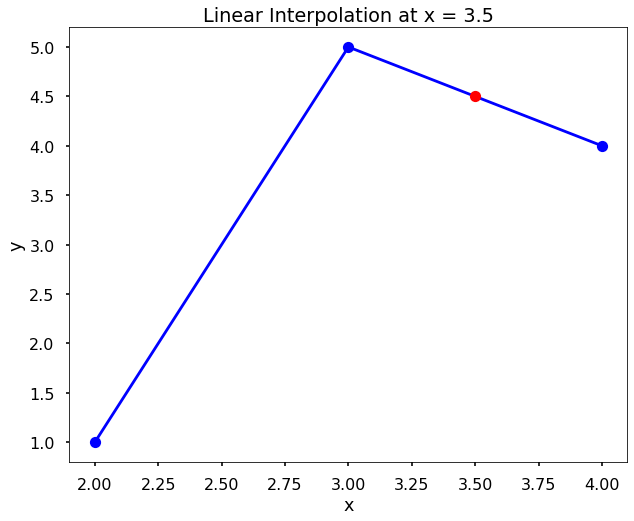

In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
x = [2, 3, 4]
y = [1, 5, 4]

f = interp1d(x, y)
y_hat = f(3.5)
print(y_hat)


plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(3.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 3.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Cublic Spline interpolation is a combination of cubic piece wisefunctions, as seen below. 

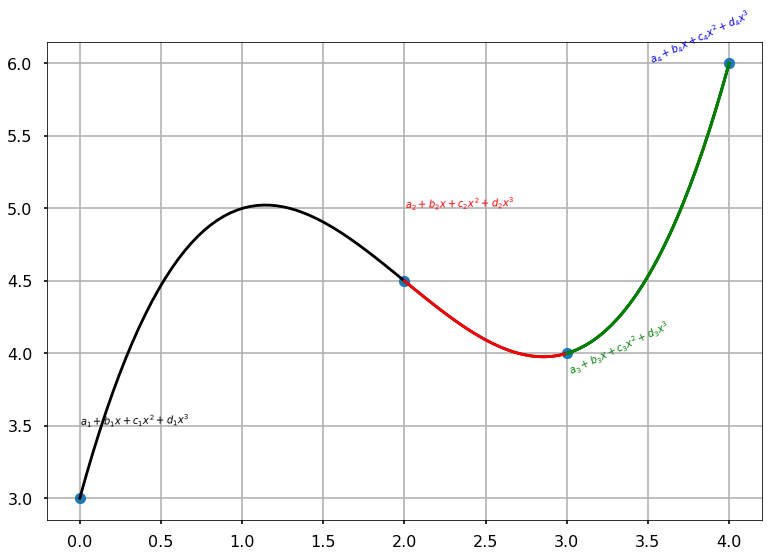

In [146]:
x = [0, 2, 3, 4]
y = [3, 4.5, 4, 6]

plt.plot(x, y, 'o')
v = CubicSpline(x, y)

u = np.linspace(x[0], x[3], 100)
plt.plot(u, v(u), 'k')
plt.text(0, 3.5, '$a_1 + b_1x + c_1x^2 + d_1x^3$', color = 'k', rotation = 1)

u = np.linspace(x[1], x[2], 100)
plt.plot(u, v(u), 'r')
plt.text(2, 5, '$a_2 + b_2x + c_2x^2 + d_2x^3$', color = 'r', rotation = 1)

u = np.linspace(x[2], x[3], 100)
plt.plot(u, v(u), 'g')
plt.text(3.0, 3.85, '$a_3 + b_3x + c_3x^2 + d_3x^3$', color = 'g', rotation = 25)

u = np.linspace(x[2], x[3], 100)
plt.plot(u, v(u), 'g')
plt.text(3.5, 6, '$a_4 + b_4x + c_4x^2 + d_4x^3$', color = 'b', rotation = 25)


plt.grid()

The data points above are joined together by a cubic equation with an X amount of coefficeints depending on the data points. Those coeffiecents each have a value, and can be determined with Python's array syntax and the command "linalg", 

In [162]:
b = np.array([2, 0, 1, 2, 0, 0, 0, 0]) #8 coefficents
b = b[:, np.newaxis]
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0], \
             [0, 0, 0, 0, 8, 4, 2, 1], [3, 2, 1, 0, -3, -2, -1, 0], [6, 2, 0, 0, -6, -2, 0, 0],\
             [0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 12, 2, 0, 0]])

np.dot(np.linalg.inv(A), b) #this calculates the value of each cofficeint 



array([[ 0.75],
       [ 0.  ],
       [-1.75],
       [ 2.  ],
       [-0.75],
       [ 4.5 ],
       [-6.25],
       [ 2.5 ]])